In [237]:
import pandas as pd
import numpy as np
import eda
import importlib

import warnings
# supress warnings in QQ plots
warnings.filterwarnings( "ignore", module = "statsmodels/graphics/gofplots.py:993*" )

importlib.reload(eda)

pd.set_option('display.max_columns', 500)

# Stop and Search

Where is the data from, what period does it cover, what does it tell us, what is in it?

In [238]:
df_stopsearch_init = pd.read_csv("data/stop_search.csv")

In [239]:
df_stopsearch_init

,Command Code,Command Desc,Division Code,Division Desc,Area Command Code,Area Command Desc,Council Code,Council Desc,Multi Member Ward,Search Date,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Search Reason,Search Type,Incident Type,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Nominal Ethnicity,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Unknown,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
0,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Northfield/Mastrick North,31/12/2020 14:00,2020,December,Thursday,14:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,38.0,Male,"Pakistani, Pakistani Scottish, Pakistani British",8,1.0,NaN,NaN,N,NaN,NaN,STANDARD
1,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Hilton/Woodside/Stockethill,31/12/2020 08:20,2020,December,Thursday,08:20:00,Positive,Sec 23(3) Misuse Of Drugs Act 1971,21.0,Warrant,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,38.0,Male,White English,2,1.0,NaN,NaN,N,NaN,NaN,STANDARD
2,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Hilton/Woodside/Stockethill,31/12/2020 08:20,2020,December,Thursday,08:20:00,Positive,Sec 23(3) Misuse Of Drugs Act 1971,21.0,Warrant,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,39.0,Male,White English,2,1.0,NaN,NaN,N,NaN,NaN,STANDARD
3,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,George St/Harbour,31/12/2020 03:30,2020,December,Thursday,03:30:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,28.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
4,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Kingswells/Sheddocksley/Summerhill,31/12/2020 02:40,2020,December,Thursday,02:40:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Female,White Other,6,1.0,NaN,NaN,N,NaN,NaN,STANDARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annandale East and Eskdale,23/11/2019 18:00,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annandale East and Eskdale,23/11/2019 18:00,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annandale East and Eskdale,23/11/2019 18:00,2019,November,Saturday,18:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,43.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Berwickshire,02/07/2019 20:00,2019,July,Tuesday,20:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,29.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD


In [240]:
df_stopsearch_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75196 entries, 0 to 75195
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  75182 non-null  float64
 1   Command Desc                  75182 non-null  object 
 2   Division Code                 75182 non-null  float64
 3   Division Desc                 75182 non-null  object 
 4   Area Command Code             75182 non-null  float64
 5   Area Command Desc             75182 non-null  object 
 6   Council Code                  75182 non-null  float64
 7   Council Desc                  75182 non-null  object 
 8   Multi Member Ward             75192 non-null  object 
 9   Search Date                   75196 non-null  object 
 10  Year                          75196 non-null  int64  
 11  Month                         75196 non-null  object 
 12  Day of the Week               75196 non-null  object 
 13  T

We can remove some columns straight away. A number have a description and, handily, a code, so we will get rid of the description and use the codes for classification:
- Command Desc
- Division Desc
- Area Command Desc
- Council Desc
- Search Resason
- Nominal Ethnicity

Search Type holds no data so can be removed.

"Desc Substance Found" also has no data but in a different data set it might, so we will leave it in place.

Search Date can be removed as we seperately have time, year, month and day of week. The only information lost is day of the month which likely doesn't have predictive power.

Incident Type has only one value, stop and search, so can be dropped. Nominal unknown also appears to have nothing useful that isn't stored in other features.



In [241]:
df_stopsearch = df_stopsearch_init.drop(["Command Desc", "Division Desc", "Area Command Desc", "Council Desc", "Search Reason", "Nominal Ethnicity", "Search Date", "Search Type","Incident Type", "Nominal Unknown"], axis=1).copy()

In [242]:
df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75196 entries, 0 to 75195
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  75182 non-null  float64
 1   Division Code                 75182 non-null  float64
 2   Area Command Code             75182 non-null  float64
 3   Council Code                  75182 non-null  float64
 4   Multi Member Ward             75192 non-null  object 
 5   Year                          75196 non-null  int64  
 6   Month                         75196 non-null  object 
 7   Day of the Week               75196 non-null  object 
 8   Time of the Day               75196 non-null  object 
 9   Search Result                 74711 non-null  object 
 10  Search Statute                74711 non-null  object 
 11  Search Reason Code            74711 non-null  float64
 12  Desc Drugs Found              23350 non-null  object 
 13  D

## Missing Data

Command/Division/Area/Council Missing for 14 examples. We know which ward 9 of thgem are in so it might be possible to repair this data.

The known wards for the missing data:

Annandale East and Eskdale: 3,West,14,Dumfries and Galloway,71,Dumfriesshire - VA,32,Dumfries & Galloway

East Berwickshire: 2,East,7,The Lothians and Scottish Borders,31,Scottish Borders - JB,18,Scottish Borders

In [243]:
indexes_to_update = df_stopsearch[ (df_stopsearch["Multi Member Ward"] == "Annandale East and Eskdale") & (df_stopsearch["Command Code"].isnull())].index
df_stopsearch.iloc[indexes_to_update,0] = 3
df_stopsearch.iloc[indexes_to_update,1] = 13
df_stopsearch.iloc[indexes_to_update,2] = 71
df_stopsearch.iloc[indexes_to_update,3] = 32

df_stopsearch.iloc[indexes_to_update]

,Command Code,Division Code,Area Command Code,Council Code,Multi Member Ward,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
75186,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2020,September,Thursday,16:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Class B,NaN,NaN,NaN,NaN,NaN,28.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD
75188,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2020,June,Friday,16:10:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,Male,2,1.0,NaN,NaN,NaN,NaN,STANDARD
75189,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2020,January,Thursday,20:15:00,Negative,Sec 66 Criminal Justice (Scotland) Act 2016 (R...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,Male,2,1.0,NaN,NaN,NaN,NaN,STANDARD
75190,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD
75191,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD
75192,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD
75193,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Class B,NaN,NaN,NaN,NaN,NaN,43.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD
75195,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,May,Monday,23:33:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,NaN,NaN,NaN,NaN,NaN,NaN,49.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD


In [244]:
indexes_to_update = df_stopsearch[ (df_stopsearch["Multi Member Ward"] == "East Berwickshire") & (df_stopsearch["Command Code"].isnull())].index
df_stopsearch.iloc[indexes_to_update,0] = 2
df_stopsearch.iloc[indexes_to_update,1] = 7
df_stopsearch.iloc[indexes_to_update,2] = 31
df_stopsearch.iloc[indexes_to_update,3] = 18

df_stopsearch.iloc[indexes_to_update]

,Command Code,Division Code,Area Command Code,Council Code,Multi Member Ward,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
75194,2.0,7.0,31.0,18.0,East Berwickshire,2019,July,Tuesday,20:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Class B,NaN,NaN,NaN,NaN,NaN,29.0,Male,1,1.0,NaN,NaN,NaN,NaN,STANDARD


We have repaired what we can, we have no information to repair the remaining missing location data and will need to drop these rows.

In [245]:
df_stopsearch = df_stopsearch[df_stopsearch["Command Code"].notnull()]

In [246]:
df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75191 entries, 0 to 75195
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  75191 non-null  float64
 1   Division Code                 75191 non-null  float64
 2   Area Command Code             75191 non-null  float64
 3   Council Code                  75191 non-null  float64
 4   Multi Member Ward             75191 non-null  object 
 5   Year                          75191 non-null  int64  
 6   Month                         75191 non-null  object 
 7   Day of the Week               75191 non-null  object 
 8   Time of the Day               75191 non-null  object 
 9   Search Result                 74706 non-null  object 
 10  Search Statute                74706 non-null  object 
 11  Search Reason Code            74706 non-null  float64
 12  Desc Drugs Found              23348 non-null  object 
 13  D

Now, what missing date is left to deal with?

<AxesSubplot:>

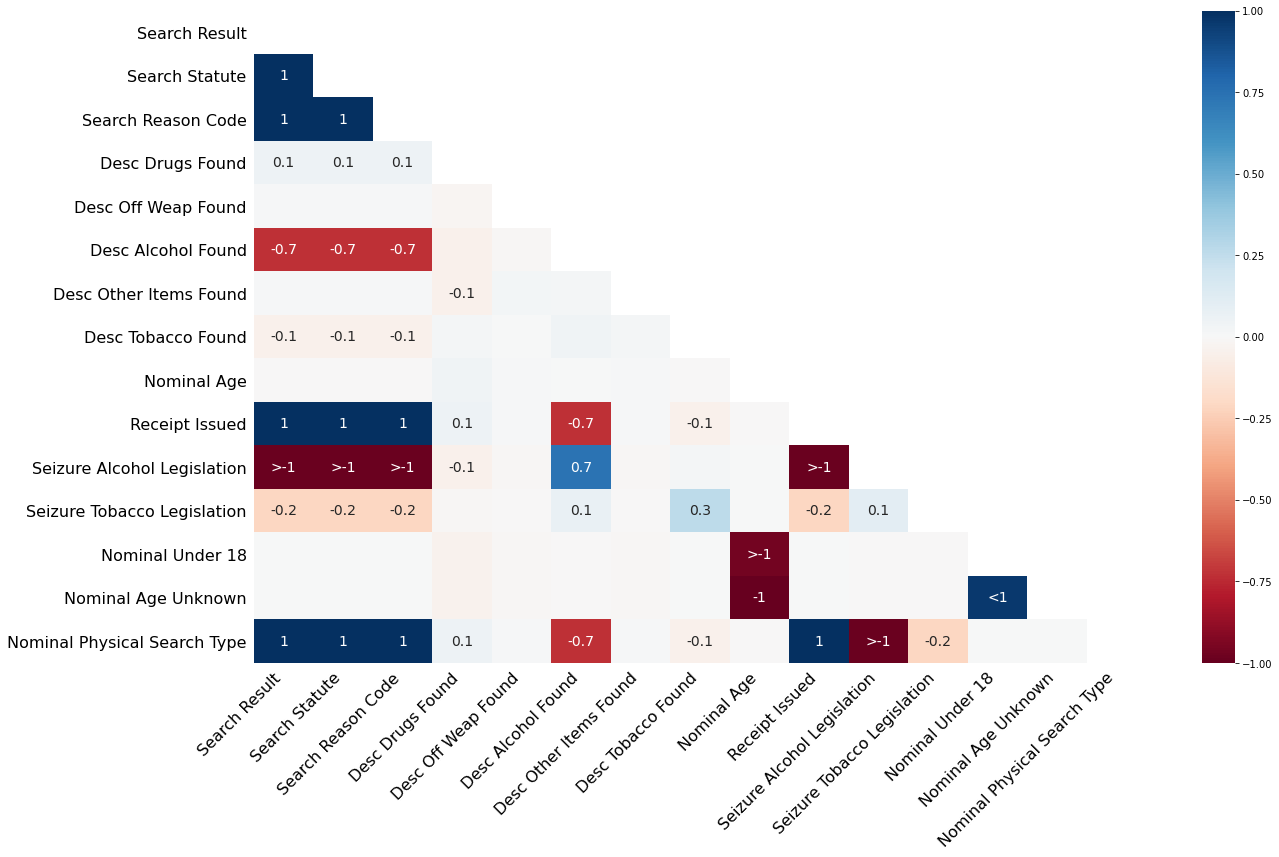

In [247]:
import missingno as msno

msno.heatmap(df_stopsearch)

<AxesSubplot:>

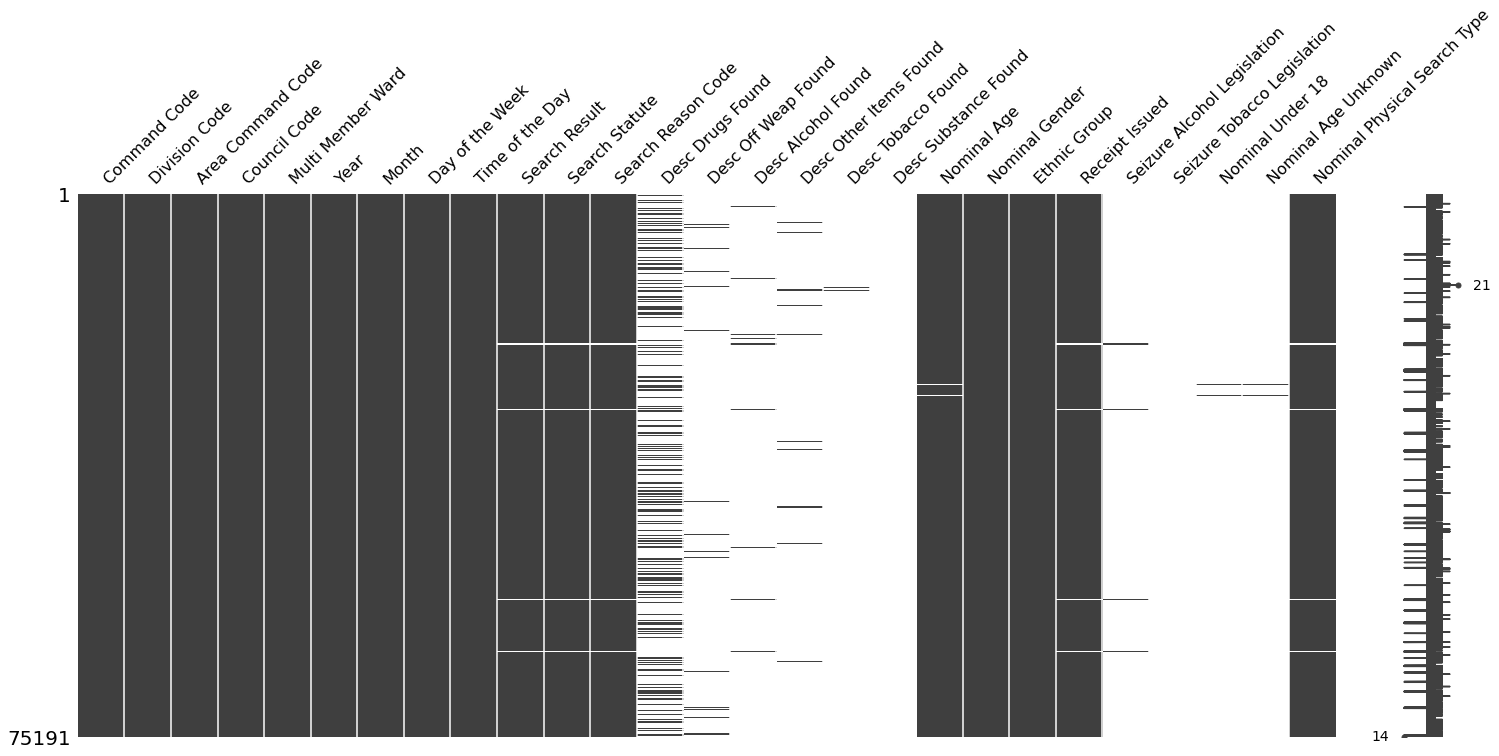

In [248]:
msno.matrix(df_stopsearch)

It seems there are number of records which have values for "seizure alcohol legislation" or "seizure tobacco legislation" and are missing several other key stop and search parameters: Search Result, Search Reason Code, Search Statute. 

In [249]:
df_stopsearch[(df_stopsearch["Seizure Alcohol Legislation"].notnull()) | (df_stopsearch["Seizure Tobacco Legislation"].notnull())]

,Command Code,Division Code,Area Command Code,Council Code,Multi Member Ward,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
1823,1.0,1.0,1.0,1.0,George St/Harbour,2019,May,Monday,15:10:00,NaN,NaN,NaN,NaN,NaN,Beer,NaN,NaN,NaN,46.0,Female,1,NaN,Local authority byelaws,NaN,NaN,NaN,NaN
8380,1.0,1.0,6.0,2.0,Inverurie and District,2019,May,Thursday,21:00:00,NaN,NaN,NaN,NaN,NaN,Spirits,NaN,NaN,NaN,15.0,Female,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
8381,1.0,1.0,6.0,2.0,Inverurie and District,2019,May,Thursday,21:00:00,NaN,NaN,NaN,NaN,NaN,Spirits,NaN,NaN,NaN,16.0,Female,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
8431,1.0,1.0,6.0,2.0,Inverurie and District,2019,May,Sunday,20:35:00,NaN,NaN,NaN,NaN,NaN,"Beer, Cider",NaN,NaN,NaN,15.0,Male,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
9171,1.0,1.0,7.0,3.0,Forres,2019,May,Friday,21:00:00,NaN,NaN,NaN,NaN,NaN,Wine,NaN,NaN,NaN,13.0,Female,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75095,3.0,11.0,59.0,26.0,Motherwell South East and Ravenscraig,2019,April,Friday,16:55:00,NaN,NaN,NaN,NaN,NaN,Cider,NaN,NaN,NaN,16.0,Male,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
75096,3.0,11.0,59.0,26.0,Motherwell South East and Ravenscraig,2019,April,Friday,16:55:00,NaN,NaN,NaN,NaN,NaN,Wine,NaN,NaN,NaN,16.0,Male,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
75097,3.0,11.0,59.0,26.0,Motherwell South East and Ravenscraig,2019,April,Friday,16:10:00,NaN,NaN,NaN,NaN,NaN,Cider,NaN,NaN,NaN,15.0,Male,1,NaN,Sec 61 (1) Crime and Punishment (Scotland) Act...,NaN,NaN,NaN,NaN
75144,3.0,11.0,59.0,26.0,Mossend and Holytown,2019,April,Friday,17:50:00,NaN,NaN,NaN,NaN,NaN,Spirits,NaN,NaN,NaN,43.0,Male,1,NaN,Local authority byelaws,NaN,NaN,NaN,NaN


These account for the missing values in these columns. These seem to be different to a normal stop and search and we will consider them out of scope of our model.

In [250]:
df_stopsearch = df_stopsearch[(df_stopsearch["Seizure Alcohol Legislation"].isnull()) & (df_stopsearch["Seizure Tobacco Legislation"].isnull())]
df_stopsearch = df_stopsearch.drop(["Seizure Alcohol Legislation", "Seizure Tobacco Legislation"], axis=1)

Now that we have no missing values in Search Result, we'll convert this to an integer.

In [251]:
df_stopsearch["Search Result"].value_counts()

col="Search Result"
df_stopsearch.loc[df_stopsearch[col] == "Positive", col] = 1
df_stopsearch.loc[df_stopsearch[col] == "Negative", col] = 0
df_stopsearch[col] = df_stopsearch[col].astype(int)

df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74706 entries, 0 to 75195
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  74706 non-null  float64
 1   Division Code                 74706 non-null  float64
 2   Area Command Code             74706 non-null  float64
 3   Council Code                  74706 non-null  float64
 4   Multi Member Ward             74706 non-null  object 
 5   Year                          74706 non-null  int64  
 6   Month                         74706 non-null  object 
 7   Day of the Week               74706 non-null  object 
 8   Time of the Day               74706 non-null  object 
 9   Search Result                 74706 non-null  int64  
 10  Search Statute                74706 non-null  object 
 11  Search Reason Code            74706 non-null  float64
 12  Desc Drugs Found              23348 non-null  object 
 13  D

In [252]:
df_stopsearch.isnull().sum().sort_values()

Command Code                        0
Receipt Issued                      0
Ethnic Group                        0
Nominal Gender                      0
Search Reason Code                  0
Search Statute                      0
Search Result                       0
Time of the Day                     0
Nominal Physical Search Type        0
Month                               0
Year                                0
Multi Member Ward                   0
Council Code                        0
Area Command Code                   0
Division Code                       0
Day of the Week                     0
Nominal Age                       297
Desc Drugs Found                51358
Desc Other Items Found          72612
Desc Off Weap Found             73005
Desc Alcohol Found              74316
Nominal Under 18                74389
Nominal Age Unknown             74409
Desc Tobacco Found              74495
Desc Substance Found            74706
dtype: int64

In [253]:
df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74706 entries, 0 to 75195
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  74706 non-null  float64
 1   Division Code                 74706 non-null  float64
 2   Area Command Code             74706 non-null  float64
 3   Council Code                  74706 non-null  float64
 4   Multi Member Ward             74706 non-null  object 
 5   Year                          74706 non-null  int64  
 6   Month                         74706 non-null  object 
 7   Day of the Week               74706 non-null  object 
 8   Time of the Day               74706 non-null  object 
 9   Search Result                 74706 non-null  int64  
 10  Search Statute                74706 non-null  object 
 11  Search Reason Code            74706 non-null  float64
 12  Desc Drugs Found              23348 non-null  object 
 13  D

We'll replace the NaNs in Nominal Age Unknown and Nominal Under 18 with 0, and replace Y in Nominal Age Unknown with 1.

In [254]:
df_stopsearch.loc[df_stopsearch["Nominal Age Unknown"] == "Y", "Nominal Age Unknown"] = 1
df_stopsearch.loc[df_stopsearch["Nominal Age Unknown"].isnull(), "Nominal Age Unknown"] = 0
df_stopsearch.loc[df_stopsearch["Nominal Under 18"].isnull(), "Nominal Under 18"] = 0
df_stopsearch["Nominal Age Unknown"] = df_stopsearch["Nominal Age Unknown"].astype(int)

We are missing some ages, the "Nominal Age Unkown" column indicates if the age was not recorded. We will look at correlations in the data, if there are no patterns emerging we will drop these age unknown rows.

In [255]:
import plotly.express as px

px.imshow(df_stopsearch.corr())

Age Unknown is heavily correlated to "Under 18". The "Under 18 column is only used when age unknown is true, and officers are required to record if they think the suspect was under 18. This looks to be data missing at random and we will drop all rows where the age is unknown and drop both of these columns.

In [256]:
df_stopsearch = df_stopsearch[df_stopsearch["Nominal Age Unknown"] == 0]
df_stopsearch = df_stopsearch.drop(["Nominal Age Unknown", "Nominal Under 18"], axis=1)

In [257]:
df_stopsearch.isnull().sum().sort_values()

Command Code                        0
Ethnic Group                        0
Nominal Gender                      0
Nominal Age                         0
Receipt Issued                      0
Search Statute                      0
Search Result                       0
Time of the Day                     0
Search Reason Code                  0
Month                               0
Year                                0
Multi Member Ward                   0
Council Code                        0
Area Command Code                   0
Division Code                       0
Day of the Week                     0
Nominal Physical Search Type        0
Desc Drugs Found                51063
Desc Other Items Found          72316
Desc Off Weap Found             72708
Desc Alcohol Found              74019
Desc Tobacco Found              74199
Desc Substance Found            74409
dtype: int64

## Found Items Descriptions

Remaining missing values are all in the description column. These columns are comma seperated lists of things found in the search.

We need to create a column for each type of found item, and set them to 1 where an item has been found.

In [258]:
found_col_names = ['Desc Drugs Found', 'Desc Other Items Found', "Desc Off Weap Found", "Desc Alcohol Found", "Desc Tobacco Found", "Desc Substance Found"]

for i, row in df_stopsearch.iterrows():
    for col_name in found_col_names:
        if isinstance(row[col_name], str):
            for item in row[col_name].split(", "):
                df_stopsearch.loc[i, f"{col_name}_{item}"] = 1

df_stopsearch = df_stopsearch.drop(found_col_names, axis=1)

In [259]:
items_found_slice = sorted(df_stopsearch.columns[df_stopsearch.columns.str.contains("Desc.*Found_", regex=True)].to_list())

df_stopsearch[items_found_slice] = df_stopsearch[items_found_slice].replace(np.nan, 0)
df_stopsearch[items_found_slice] = df_stopsearch[items_found_slice].astype(int)

In [260]:
df_stopsearch[items_found_slice].sum()

Desc Alcohol Found_Beer                           78
Desc Alcohol Found_Cider                          68
Desc Alcohol Found_Spirits                       146
Desc Alcohol Found_Wine                          133
Desc Drugs Found_Class A                        5425
Desc Drugs Found_Class B                       15368
Desc Drugs Found_Class C                        4227
Desc Drugs Found_Nps                             128
Desc Off Weap Found_Bladed Instrument            973
Desc Off Weap Found_Blunt Instrument             328
Desc Off Weap Found_Other                        218
Desc Off Weap Found_Pointed Article              376
Desc Other Items Found_Controlled Container       26
Desc Other Items Found_Crossbows                   4
Desc Other Items Found_Disposal Of Cash          170
Desc Other Items Found_Firearms                   96
Desc Other Items Found_Fireworks                  18
Desc Other Items Found_Other                     349
Desc Other Items Found_Stolen Property        

Many of these columns will probably need combined to create large enough distributions to learn against, but we will deal with that during the machine learning phase.

In [261]:
df_stopsearch.isnull().sum().sort_values()

Command Code                                   0
Desc Other Items Found_Other                   0
Desc Off Weap Found_Bladed Instrument          0
Desc Other Items Found_Firearms                0
Desc Off Weap Found_Pointed Article            0
Desc Other Items Found_Stolen Property         0
Desc Off Weap Found_Blunt Instrument           0
Desc Tobacco Found_Tobacco                     0
Desc Other Items Found_Disposal Of Cash        0
Desc Alcohol Found_Beer                        0
Desc Tobacco Found_Cigarette Papers            0
Desc Drugs Found_Nps                           0
Desc Alcohol Found_Wine                        0
Desc Alcohol Found_Spirits                     0
Desc Other Items Found_Crossbows               0
Desc Other Items Found_Controlled Container    0
Desc Off Weap Found_Other                      0
Desc Drugs Found_Class A                       0
Desc Drugs Found_Class C                       0
Desc Drugs Found_Class B                       0
Division Code       

Hooray! No more missing values.

In [262]:
df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74409 entries, 0 to 75195
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Command Code                                 74409 non-null  float64
 1   Division Code                                74409 non-null  float64
 2   Area Command Code                            74409 non-null  float64
 3   Council Code                                 74409 non-null  float64
 4   Multi Member Ward                            74409 non-null  object 
 5   Year                                         74409 non-null  int64  
 6   Month                                        74409 non-null  object 
 7   Day of the Week                              74409 non-null  object 
 8   Time of the Day                              74409 non-null  object 
 9   Search Result                                74409 non-null  int64  
 10

## Categorical Features

The only string should be Mullti Member Ward, as this will be used to combine the SIMD and Stop and Search data but then be removed before learning.

Three of the string.object columns are straightforward to convert to categorical variables: Gender, Physical Search Type, Search Statute.

Some other numeric columns should also be categorical, and are easily converted: Command/Division/Area/Council Code, Ethnic Group, Search Reason Code

In [264]:
get_dummies_cols = ["Search Statute", "Nominal Gender", "Nominal Physical Search Type", "Command Code", "Division Code", "Area Command Code", "Council Code", "Search Reason Code"]

df_stopsearch = pd.get_dummies(df_stopsearch, columns=get_dummies_cols, drop_first=True)

Month, Day of Week and Time of Day would be better suited to sin/cos transformations for use as continuous variables. It's unclear whether these are going to be important features in the model. We will first see how well the model works before looking at these columns again, but will leave them in place for now.

In [265]:
print(df_stopsearch.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74409 entries, 0 to 75195
Columns: 171 entries, Multi Member Ward to Search Reason Code_23.0
dtypes: float64(2), int64(24), object(4), uint8(141)
memory usage: 29.6+ MB
None


## Floats and Ints

Some integer columns are set as floats, we can tidy this up.

In [266]:
int_cols = ["Receipt Issued", "Nominal Age"]

df_stopsearch[int_cols] = df_stopsearch[int_cols].astype(int)

In [267]:
df_stopsearch

,Multi Member Ward,Year,Month,Day of the Week,Time of the Day,Search Result,Nominal Age,Ethnic Group,Receipt Issued,Desc Drugs Found_Class B,Desc Drugs Found_Class C,Desc Drugs Found_Class A,Desc Off Weap Found_Other,Desc Other Items Found_Other,Desc Off Weap Found_Bladed Instrument,Desc Other Items Found_Firearms,Desc Off Weap Found_Pointed Article,Desc Other Items Found_Stolen Property,Desc Off Weap Found_Blunt Instrument,Desc Tobacco Found_Tobacco,Desc Other Items Found_Disposal Of Cash,Desc Alcohol Found_Beer,Desc Tobacco Found_Cigarette Papers,Desc Drugs Found_Nps,Desc Alcohol Found_Wine,Desc Alcohol Found_Spirits,Desc Other Items Found_Crossbows,Desc Other Items Found_Controlled Container,Desc Alcohol Found_Cider,Desc Other Items Found_Fireworks,Search Statute_CONTROLLED CONTAINERS - Sec 21 Criminal Law (Consolidation) (Scotland) Act 1995,Search Statute_CONTROLLLED ARTICLE OR SUBSTANCE - Sec 21 Criminal Law (Consolidation) (Scotland) Act 1995,Search Statute_Edinburgh Airport Byelaw 9(2) (Search in interest of public safety),"Search Statute_Sec 109(1) Copyright, Designs and Patents Act 1988 (Piracy and trademark offences etc)",Search Statute_Sec 11 of the Protection of Badgers Act 1992 (Wildlife Crime),Search Statute_Sec 11A of the Fireworks Act 2003,Search Statute_Sec 19 of the Wildlife and Countryside Act 1981,Search Statute_Sec 20 & 32 Police and Fire Reform (Scotland) Act 2012 (Other),Search Statute_Sec 20 & 32 Police and Fire Reform (Scotland) Act 2012 (Protection of Life),Search Statute_Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),Search Statute_Sec 23(3) Misuse Of Drugs Act 1971,Search Statute_Sec 23A of the Misuse of Drugs Act 1971 (Drugs),"Search Statute_Sec 24(1) Forgery and Counterfeiting Act, 1981 (Search for counterfeit money)",Search Statute_Sec 27 Deer (Scotland) Act 1996,Search Statute_Sec 289 Proceeds of Crime Act 2002 (Cash),Search Statute_Sec 4 of the Crossbows Act 1987,Search Statute_Sec 46(1) Firearms Act 1968,Search Statute_Sec 47(1) Firearms Act 1968 (Firearms),Search Statute_Sec 48(1) of the Criminal Law (Consolidation) (Scotland) Act 1995 (Offensive Weapon),Search Statute_Sec 49B of the Criminal Law (Consolidation) (Scotland) Act 1995 (Bladed Weapon/Offensive Weapon Schools),Search Statute_Sec 50 of the Criminal Law (Consolidation) (Scotland) Act 1995 (Bladed Weapon),Search Statute_Sec 53(1) of The Salmon and Freshwater Fisheries (Consolidation)(Scotland) Act 2003,Search Statute_Sec 60 Criminal Justice and Public Order Act 1994,Search Statute_Sec 60(1) Civic Government (Scotland) Act 1982 (Stolen Property),Search Statute_Sec 66 Criminal Justice (Scotland) Act 2016 (Removal of person),Search Statute_Sec 7 of the Wild Mammals (Scotland) Act 2002 (Wildlife Crime),Search Statute_Warrant - Other,Nominal Gender_Male,Nominal Physical Search Type_STRIP_IS,Nominal Physical Search Type_STRIP_OS,Command Code_2.0,Command Code_3.0,Division Code_3.0,Division Code_4.0,Division Code_5.0,Division Code_6.0,Division Code_7.0,Division Code_8.0,Division Code_9.0,Division Code_10.0,Division Code_11.0,Division Code_12.0,Division Code_13.0,Division Code_14.0,Area Command Code_3.0,Area Command Code_4.0,Area Command Code_6.0,Area Command Code_7.0,Area Command Code_8.0,Area Command Code_10.0,Area Command Code_11.0,Area Command Code_13.0,Area Command Code_14.0,Area Command Code_15.0,Area Command Code_16.0,Area Command Code_17.0,Area Command Code_18.0,Area Command Code_20.0,Area Command Code_21.0,Area Command Code_22.0,Area Command Code_24.0,Area Command Code_25.0,Area Command Code_27.0,Area Command Code_28.0,Area Command Code_29.0,Area Command Code_30.0,Area Command Code_31.0,Area Command Code_32.0,Area Command Code_34.0,Area Command Code_35.0,Area Command Code_38.0,Area Command Code_40.0,Area Command Code_42.0,Area Command Code_45.0,Area Command Code_46.0,Area Command Code_47.0,Area Command Code_49.0,Area Command Code_50.0,Area Command Code_52.0,Area Command Code_53.0,Area Command Code_54.0,Area Command Code_55.0,Area 